In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

# Spotify Dataset EDA

In [3]:
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [4]:
df.head()

uris                                              names  \
0  5LTzAKRZ2Xct8d6vVrErha                                              Don't   
1  6PCUP3dWmTjcTtXY02oFdT                                 Castle on the Hill   
2  3di5hcvxxciiqwMH1jarhY                               Set Fire to the Rain   
3  3B7udSGy2PfgoCniMSb523  I See Fire - From "The Hobbit - The Desolation...   
4  5NORWMFC27ywGSZxi8uquP                                            Ophelia   

    artist_names             artist_uris  artist_pop  \
0     Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          88   
1     Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          88   
2          Adele  4dpARuHxo51G3z768sgnrY          84   
3     Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          88   
4  The Lumineers  16oZKvXb6WkQlVAjwo2Wbg          77   

                                     artist_genres  \
0       ['pop', 'singer-songwriter pop', 'uk pop']   
1       ['pop', 'singer-songwriter pop', 'uk pop']   
2    ['british soul', 'pop', 'pop soul', 'uk pop']   
3       ['pop', 'singer-songwriter pop', 'uk pop']   
4  ['folk-pop', 'modern rock', 'stomp and holler']   

                                              albums  track_pop  danceability  \
0                                x (Wembley Edition)         45         0.806   
1                                         ÷ (Deluxe)         82         0.461   
2                                                 21         87         0.603   
3  The Hobbit - The Desolation Of Smaug (Original...         73         0.581   
4                                          Cleopatra         82         0.664   

   energy  keys  loudness  modes  speechiness  acousticness  instrumentalness  \
0  0.6080     1    -7.008      1       0.0659       0.01130          0.000000   
1  0.8340     2    -4.868      1       0.0989       0.02320          0.000011   
2  0.6700     2    -3.882      0       0.0249       0.00408          0.000002   
3  0.0549    10   -20.514      0       0.0397       0.55900          0.000000   
4  0.5730     5    -6.519      1       0.0277       0.61300          0.000363   

   liveness  valences   tempos           types                     ids  \
0    0.6350     0.849   95.049  audio_features  5LTzAKRZ2Xct8d6vVrErha   
1    0.1400     0.471  135.007  audio_features  6PCUP3dWmTjcTtXY02oFdT   
2    0.1120     0.446  107.993  audio_features  3di5hcvxxciiqwMH1jarhY   
3    0.0718     0.234  152.037  audio_features  3B7udSGy2PfgoCniMSb523   
4    0.0857     0.566   76.023  audio_features  5NORWMFC27ywGSZxi8uquP   

                                         track_hrefs  \
0  https://api.spotify.com/v1/tracks/5LTzAKRZ2Xct...   
1  https://api.spotify.com/v1/tracks/6PCUP3dWmTjc...   
2  https://api.spotify.com/v1/tracks/3di5hcvxxcii...   
3  https://api.spotify.com/v1/tracks/3B7udSGy2Pfg...   
4  https://api.spotify.com/v1/tracks/5NORWMFC27yw...   

                                       analysis_urls  durations_ms  \
0  https://api.spotify.com/v1/audio-analysis/5LTz...        219840   
1  https://api.spotify.com/v1/audio-analysis/6PCU...        261154   
2  https://api.spotify.com/v1/audio-analysis/3di5...        242974   
3  https://api.spotify.com/v1/audio-analysis/3B7u...        300840   
4  https://api.spotify.com/v1/audio-analysis/5NOR...        160097   

   time_signatures    playlist_name  
0                4  Rob Performance  
1                4  Rob Performance  
2                4  Rob Performance  
3                4  Rob Performance  
4                4  Rob Performance

In [5]:
df.shape

(5737, 26)

In [6]:
df.columns

Index(['uris', 'names', 'artist_names', 'artist_uris', 'artist_pop',
       'artist_genres', 'albums', 'track_pop', 'danceability', 'energy',
       'keys', 'loudness', 'modes', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valences', 'tempos', 'types', 'ids',
       'track_hrefs', 'analysis_urls', 'durations_ms', 'time_signatures',
       'playlist_name'],
      dtype='object')

## Remove Uneccessary Columns

In [7]:
def select_columns(df):
    df =  df[['uris', 'artist_pop',
       'artist_genres', 'track_pop', 'danceability', 'energy',
       'keys', 'loudness', 'modes', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valences', 'tempos', 'durations_ms', 'time_signatures']]
    return df
    
df = select_columns(df)

In [8]:
df.head()

uris  artist_pop  \
0  5LTzAKRZ2Xct8d6vVrErha          88   
1  6PCUP3dWmTjcTtXY02oFdT          88   
2  3di5hcvxxciiqwMH1jarhY          84   
3  3B7udSGy2PfgoCniMSb523          88   
4  5NORWMFC27ywGSZxi8uquP          77   

                                     artist_genres  track_pop  danceability  \
0       ['pop', 'singer-songwriter pop', 'uk pop']         45         0.806   
1       ['pop', 'singer-songwriter pop', 'uk pop']         82         0.461   
2    ['british soul', 'pop', 'pop soul', 'uk pop']         87         0.603   
3       ['pop', 'singer-songwriter pop', 'uk pop']         73         0.581   
4  ['folk-pop', 'modern rock', 'stomp and holler']         82         0.664   

   energy  keys  loudness  modes  speechiness  acousticness  instrumentalness  \
0  0.6080     1    -7.008      1       0.0659       0.01130          0.000000   
1  0.8340     2    -4.868      1       0.0989       0.02320          0.000011   
2  0.6700     2    -3.882      0       0.0249       0.00408          0.000002   
3  0.0549    10   -20.514      0       0.0397       0.55900          0.000000   
4  0.5730     5    -6.519      1       0.0277       0.61300          0.000363   

   liveness  valences   tempos  durations_ms  time_signatures  
0    0.6350     0.849   95.049        219840                4  
1    0.1400     0.471  135.007        261154                4  
2    0.1120     0.446  107.993        242974                4  
3    0.0718     0.234  152.037        300840                4  
4    0.0857     0.566   76.023        160097                4

## Basic EDA and Visualizations

In [9]:
df.describe()

artist_pop    track_pop  danceability       energy         keys  \
count  5737.000000  5737.000000   5737.000000  5737.000000  5737.000000   
mean     62.233920    65.858986      0.589594     0.556608     5.100052   
std      17.870184    14.805485      0.207348     0.273098     3.590350   
min       5.000000     0.000000      0.056500     0.000062     0.000000   
25%      48.000000    57.000000      0.474000     0.422000     2.000000   
50%      63.000000    67.000000      0.626000     0.617000     5.000000   
75%      76.000000    78.000000      0.742000     0.758000     8.000000   
max     100.000000   100.000000      0.975000     0.997000    11.000000   

          loudness        modes  speechiness  acousticness  instrumentalness  \
count  5737.000000  5737.000000  5737.000000   5737.000000       5737.000000   
mean    -10.795329     0.668642     0.091499      0.333655          0.159684   
std       9.731474     0.470742     0.094018      0.346603          0.328111   
min     -50.060000     0.000000     0.022700      0.000002          0.000000   
25%     -10.451000     0.000000     0.038300      0.040200          0.000000   
50%      -7.231000     1.000000     0.050400      0.182000          0.000016   
75%      -5.421000     1.000000     0.095100      0.585000          0.018100   
max       1.508000     1.000000     0.880000      0.996000          0.991000   

          liveness     valences       tempos   durations_ms  time_signatures  
count  5737.000000  5737.000000  5737.000000    5737.000000      5737.000000  
mean      0.165350     0.450876   116.713311  213381.858637         3.898902  
std       0.130182     0.254843    28.840498   71262.618579         0.475216  
min       0.015400     0.000000    31.237000   50765.000000         1.000000  
25%       0.093900     0.236000    95.153000  168421.000000         4.000000  
50%       0.114000     0.440000   117.000000  200129.000000         4.000000  
75%       0.188000     0.647000   134.932000  240938.000000         4.000000  
max       0.980000     0.978000   230.186000  812625.000000         5.000000

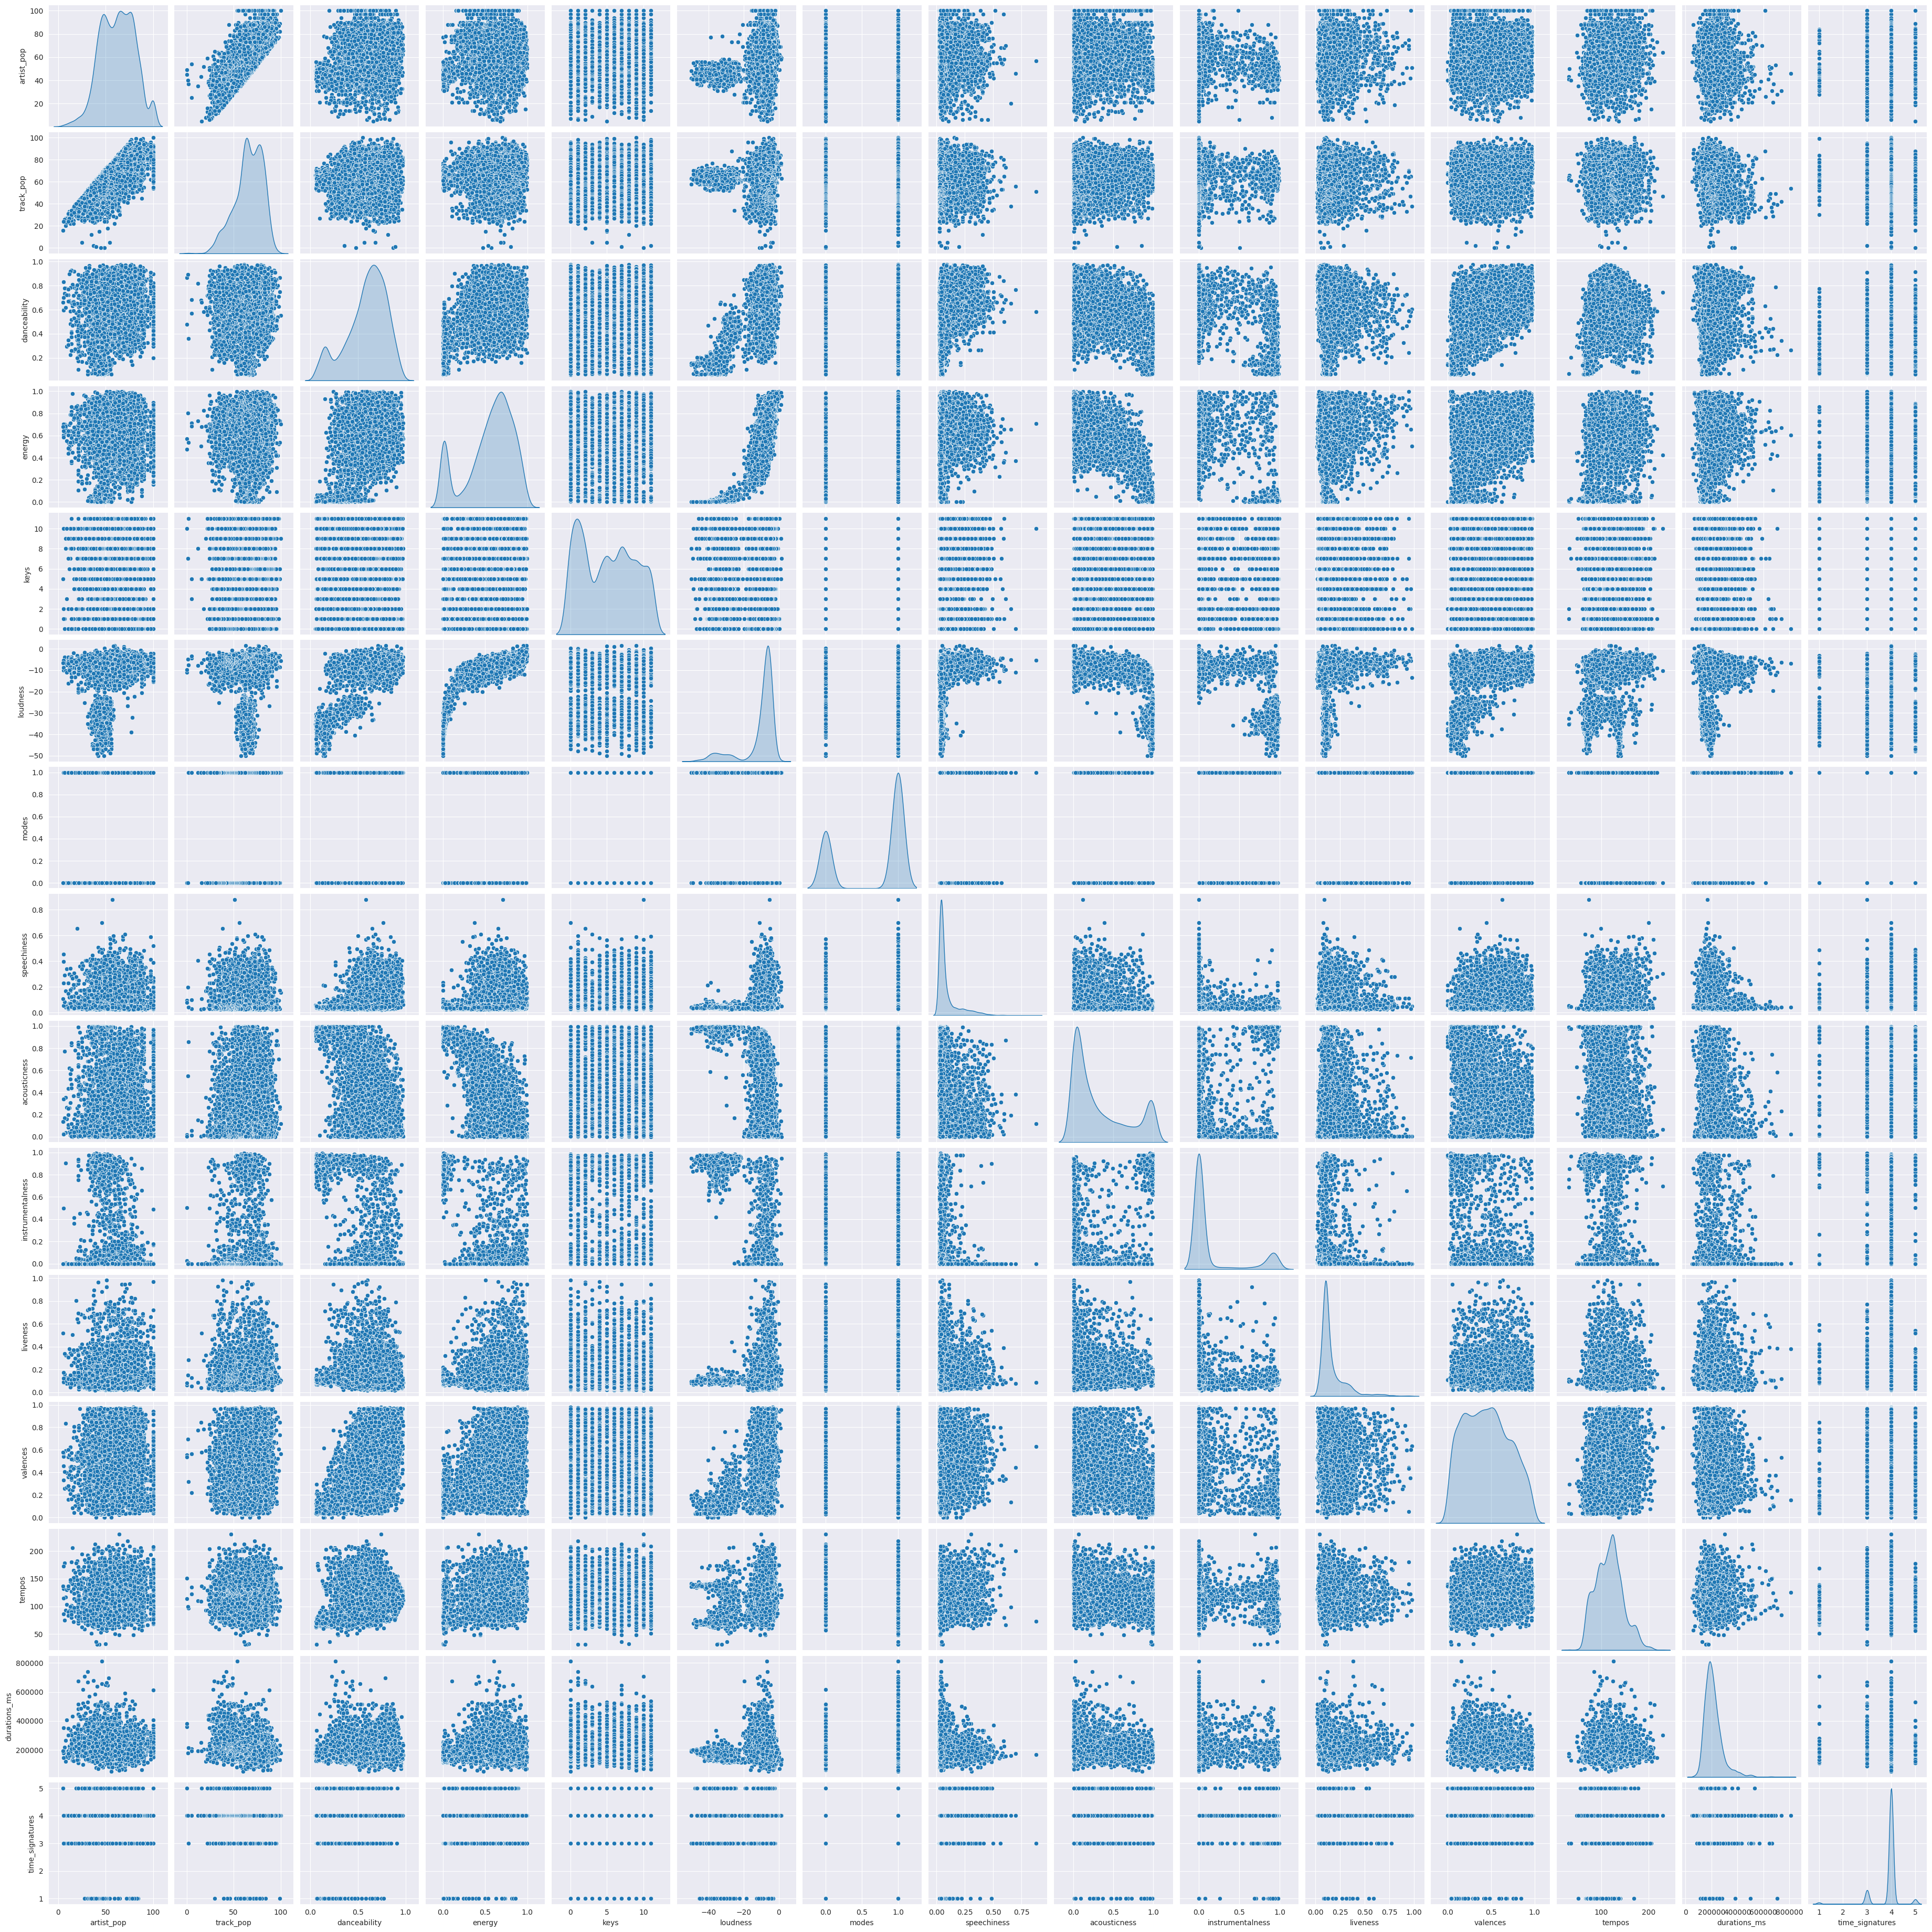

In [10]:
sns.pairplot(df, diag_kind='kde')
plt.show()

## Feature Creation

### One Hot Encoding

In [11]:
def ohe_prep(df, column):
    df_encoded = pd.get_dummies(df, columns=[column], dtype=int) 
    return df_encoded

In [12]:
df_test = ohe_prep(df, 'modes')

In [13]:
df_test.columns

Index(['uris', 'artist_pop', 'artist_genres', 'track_pop', 'danceability',
       'energy', 'keys', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valences', 'tempos', 'durations_ms',
       'time_signatures', 'modes_0', 'modes_1'],
      dtype='object')

In [14]:
df_test['modes_0']

0       0
1       0
2       1
3       1
4       0
       ..
5732    0
5733    1
5734    1
5735    1
5736    1
Name: modes_0, Length: 5737, dtype: int64

### Normalize Popularity Values

In [15]:
scaler = MinMaxScaler()
df[['artist_pop', 'track_pop']] = scaler.fit_transform(df[['artist_pop', 'track_pop']])

### TFID Transformation

In [16]:
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 1),min_df=0.0)
tfidf_matrix = tf.fit_transform(df['artist_genres'])

In [17]:
len(tf.vocabulary_)

582

In [18]:
tfidf_matrix.shape

(5737, 582)

In [19]:
genre_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names_out())

In [20]:
genre_df.columns = ['genre' + "|" + i for i in genre_df.columns]

In [21]:
genre_df.head()

genre|528hz  genre|abstract  genre|acid  genre|acoustic  genre|adult  \
0          0.0             0.0         0.0             0.0          0.0   
1          0.0             0.0         0.0             0.0          0.0   
2          0.0             0.0         0.0             0.0          0.0   
3          0.0             0.0         0.0             0.0          0.0   
4          0.0             0.0         0.0             0.0          0.0   

   genre|advocacy  genre|aesthetic  genre|african  genre|afrikaans  \
0             0.0              0.0            0.0              0.0   
1             0.0              0.0            0.0              0.0   
2             0.0              0.0            0.0              0.0   
3             0.0              0.0            0.0              0.0   
4             0.0              0.0            0.0              0.0   

   genre|afro  genre|afrobeat  genre|afrobeats  genre|afrofuturism  \
0         0.0             0.0              0.0                 0.0   
1         0.0             0.0              0.0                 0.0   
2         0.0             0.0              0.0                 0.0   
3         0.0             0.0              0.0                 0.0   
4         0.0             0.0              0.0                 0.0   

   genre|afropop  genre|afroswing  genre|age  genre|aggressive  genre|alabama  \
0            0.0              0.0        0.0               0.0            0.0   
1            0.0              0.0        0.0               0.0            0.0   
2            0.0              0.0        0.0               0.0            0.0   
3            0.0              0.0        0.0               0.0            0.0   
4            0.0              0.0        0.0               0.0            0.0   

   genre|alberta  genre|album  genre|alt  genre|alte  genre|alternative  \
0            0.0          0.0        0.0         0.0                0.0   
1            0.0          0.0        0.0         0.0                0.0   
2            0.0          0.0        0.0         0.0                0.0   
3            0.0          0.0        0.0         0.0                0.0   
4            0.0          0.0        0.0         0.0                0.0   

   genre|amapiano  genre|ambient  ...  genre|venezolano  genre|vibe  \
0             0.0            0.0  ...               0.0         0.0   
1             0.0            0.0  ...               0.0         0.0   
2             0.0            0.0  ...               0.0         0.0   
3             0.0            0.0  ...               0.0         0.0   
4             0.0            0.0  ...               0.0         0.0   

   genre|video  genre|vincy  genre|vintage  genre|viral  genre|virginia  \
0          0.0          0.0            0.0          0.0             0.0   
1          0.0          0.0            0.0          0.0             0.0   
2          0.0          0.0            0.0          0.0             0.0   
3          0.0          0.0            0.0          0.0             0.0   
4          0.0          0.0            0.0          0.0             0.0   

   genre|vocal  genre|wave  genre|weirdcore  genre|west  genre|westcoast  \
0          0.0         0.0              0.0         0.0              0.0   
1          0.0         0.0              0.0         0.0              0.0   
2          0.0         0.0              0.0         0.0              0.0   
3          0.0         0.0              0.0         0.0              0.0   
4          0.0         0.0              0.0         0.0              0.0   

   genre|western  genre|women  genre|wonky  genre|world  genre|worship  \
0            0.0          0.0          0.0          0.0            0.0   
1            0.0          0.0          0.0          0.0            0.0   
2            0.0          0.0          0.0          0.0            0.0   
3            0.0          0.0          0.0          0.0            0.0   
4            0.0          0.0          0.0          0.0            

In [22]:
genre_df.describe()

genre|528hz  genre|abstract   genre|acid  genre|acoustic  genre|adult  \
count  5737.000000     5737.000000  5737.000000     5737.000000  5737.000000   
mean      0.000523        0.000093     0.000360        0.000440     0.002288   
std       0.022863        0.007075     0.010394        0.015283     0.030090   
min       0.000000        0.000000     0.000000        0.000000     0.000000   
25%       0.000000        0.000000     0.000000        0.000000     0.000000   
50%       0.000000        0.000000     0.000000        0.000000     0.000000   
75%       0.000000        0.000000     0.000000        0.000000     0.000000   
max       1.000000        0.535917     0.335194        0.631369     0.503633   

       genre|advocacy  genre|aesthetic  genre|african  genre|afrikaans  \
count     5737.000000      5737.000000    5737.000000      5737.000000   
mean         0.000123         0.000325       0.014026         0.011422   
std          0.009336         0.017432       0.086359         0.105096   
min          0.000000         0.000000       0.000000         0.000000   
25%          0.000000         0.000000       0.000000         0.000000   
50%          0.000000         0.000000       0.000000         0.000000   
75%          0.000000         0.000000       0.000000         0.000000   
max          0.707107         0.933686       0.847077         1.000000   

        genre|afro  genre|afrobeat  genre|afrobeats  genre|afrofuturism  \
count  5737.000000     5737.000000      5737.000000         5737.000000   
mean      0.004009        0.000133         0.005162            0.002080   
std       0.048321        0.010083         0.056163            0.040762   
min       0.000000        0.000000         0.000000            0.000000   
25%       0.000000        0.000000         0.000000            0.000000   
50%       0.000000        0.000000         0.000000            0.000000   
75%       0.000000        0.000000         0.000000            0.000000   
max       0.805444        0.763704         1.000000            1.000000   

       genre|afropop  genre|afroswing    genre|age  genre|aggressive  \
count    5737.000000      5737.000000  5737.000000       5737.000000   
mean        0.001617         0.000938     0.000391          0.000141   
std         0.028493         0.027379     0.013363          0.007562   
min         0.000000         0.000000     0.000000          0.000000   
25%         0.000000         0.000000     0.000000          0.000000   
50%         0.000000         0.000000     0.000000          0.000000   
75%         0.000000         0.000000     0.000000          0.000000   
max         0.624688         1.000000     0.751248          0.405055   

       genre|alabama  genre|alberta  genre|album    genre|alt   genre|alte  \
count    5737.000000    5737.000000  5737.000000  5737.000000  5737.000000   
mean        0.000262       0.000126     0.006598     0.007709     0.000505   
std         0.014267       0.006945     0.038672     0.075980     0.017493   
min         0.000000       0.000000     0.000000     0.000000     0.000000   
25%         0.000000       0.000000     0.000000     0.000000     0.000000   
50%         0.000000       0.000000     0.000000     0.000000     0.000000   
75%         0.000000       0.000000     0.000000     0.000000     0.000000   
max         0.887149       0.452770     0.490417     1.000000     0.686692   

       genre|alternative  genre|amapiano  genre|ambient  ...  \
count        5737.000000     5737.000000    5737.000000  ...   
mean            0.014547        0.023405       0.000444  ...   
std             0.088552        0.146214       0.015262  ...   
min             0.000000        0.000000       0.000000  ...   
25%             0.000000        0.000000       0.000000  ...   
50%             0.000000        0.000000       0.000000  ...   
75%             0.000000        0.000000       0.000000  ...   
max             1.000000        1.000000       0.618333  ...   

       genre|v

In [23]:
genre_df.columns

Index(['genre|528hz', 'genre|abstract', 'genre|acid', 'genre|acoustic',
       'genre|adult', 'genre|advocacy', 'genre|aesthetic', 'genre|african',
       'genre|afrikaans', 'genre|afro',
       ...
       'genre|world', 'genre|worship', 'genre|xhosa', 'genre|yacht',
       'genre|ye', 'genre|yodeling', 'genre|york', 'genre|zambian',
       'genre|zcc', 'genre|zolo'],
      dtype='object', length=582)

In [24]:
def tfidf_transformation(df, tf=None):
    if tf is None:
        tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 1),min_df=0.0)
        tfidf_matrix = tf.fit_transform(df['artist_genres'])
    else:
        tfidf_matrix = tf.transform(df['artist_genres'])
        
    genre_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tf.get_feature_names_out())
    genre_df.columns = ['genre' + "|" + i for i in genre_df.columns]

    df = df.drop(columns=['artist_genres'])

    df = pd.concat([df.reset_index(drop=True), genre_df.reset_index(drop=True)], axis=1)  # Reset index to avoid rows being added due to index in memory
    return df, tf

In [25]:
df, tf = tfidf_transformation(df)

In [26]:
df.describe()

artist_pop    track_pop  danceability       energy         keys  \
count  5737.000000  5737.000000   5737.000000  5737.000000  5737.000000   
mean      0.602462     0.658590      0.589594     0.556608     5.100052   
std       0.188107     0.148055      0.207348     0.273098     3.590350   
min       0.000000     0.000000      0.056500     0.000062     0.000000   
25%       0.452632     0.570000      0.474000     0.422000     2.000000   
50%       0.610526     0.670000      0.626000     0.617000     5.000000   
75%       0.747368     0.780000      0.742000     0.758000     8.000000   
max       1.000000     1.000000      0.975000     0.997000    11.000000   

          loudness        modes  speechiness  acousticness  instrumentalness  \
count  5737.000000  5737.000000  5737.000000   5737.000000       5737.000000   
mean    -10.795329     0.668642     0.091499      0.333655          0.159684   
std       9.731474     0.470742     0.094018      0.346603          0.328111   
min     -50.060000     0.000000     0.022700      0.000002          0.000000   
25%     -10.451000     0.000000     0.038300      0.040200          0.000000   
50%      -7.231000     1.000000     0.050400      0.182000          0.000016   
75%      -5.421000     1.000000     0.095100      0.585000          0.018100   
max       1.508000     1.000000     0.880000      0.996000          0.991000   

          liveness     valences       tempos   durations_ms  time_signatures  \
count  5737.000000  5737.000000  5737.000000    5737.000000      5737.000000   
mean      0.165350     0.450876   116.713311  213381.858637         3.898902   
std       0.130182     0.254843    28.840498   71262.618579         0.475216   
min       0.015400     0.000000    31.237000   50765.000000         1.000000   
25%       0.093900     0.236000    95.153000  168421.000000         4.000000   
50%       0.114000     0.440000   117.000000  200129.000000         4.000000   
75%       0.188000     0.647000   134.932000  240938.000000         4.000000   
max       0.980000     0.978000   230.186000  812625.000000         5.000000   

       genre|528hz  genre|abstract   genre|acid  genre|acoustic  genre|adult  \
count  5737.000000     5737.000000  5737.000000     5737.000000  5737.000000   
mean      0.000523        0.000093     0.000360        0.000440     0.002288   
std       0.022863        0.007075     0.010394        0.015283     0.030090   
min       0.000000        0.000000     0.000000        0.000000     0.000000   
25%       0.000000        0.000000     0.000000        0.000000     0.000000   
50%       0.000000        0.000000     0.000000        0.000000     0.000000   
75%       0.000000        0.000000     0.000000        0.000000     0.000000   
max       1.000000        0.535917     0.335194        0.631369     0.503633   

       genre|advocacy  genre|aesthetic  genre|african  genre|afrikaans  \
count     5737.000000      5737.000000    5737.000000      5737.000000   
mean         0.000123         0.000325       0.014026         0.011422   
std          0.009336         0.017432       0.086359         0.105096   
min          0.000000         0.000000       0.000000         0.000000   
25%          0.000000         0.000000       0.000000         0.000000   
50%          0.000000         0.000000       0.000000         0.000000   
75%          0.000000         0.000000       0.000000         0.000000   
max          0.707107         0.933686       0.847077         1.000000   

        genre|afro  ...  genre|venezolano   genre|vibe  genre|video  \
count  5737.000000  ...       5737.000000  5737.000000  5737.000000   
mean      0.004009  ...          0.000280     0.000106     0.000093   
std       0.048321  ...          0.010585     0.008043     0.007065   
min       0.000000  ...          0.000000     0.000000     0.000000   
25%       0.000000  ...          0.000000     0.000000     0.000000   
50%       0.000000  ...          0.000000     0.000000     0.000000   
75%  

## Pipeline

In [27]:
def data_pipeline(df, tf=None):
    # Select only the necessary columns
    df = select_columns(df)

    # Perfrom OHE
    df = ohe_prep(df, 'modes')
    df = ohe_prep(df, 'keys')
    df = ohe_prep(df, 'time_signatures')

    # Normalize popularity values
    scaler = MinMaxScaler()
    df[['artist_pop', 'track_pop', 'durations_ms']] = scaler.fit_transform(df[['artist_pop', 'track_pop', 'durations_ms']])

    # Perform TFID vectorization on genres
    df, tf = tfidf_transformation(df, tf)
    # df = df.drop(columns=['artist_genres'])

    df = df.set_index(keys='uris', drop=True)

    return df, tf

## Pipeline in Action

In [28]:
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [29]:
df, tf = data_pipeline(df)

In [30]:
df.head()

artist_pop  track_pop  danceability  energy  loudness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha    0.873684       0.45         0.806  0.6080    -7.008   
6PCUP3dWmTjcTtXY02oFdT    0.873684       0.82         0.461  0.8340    -4.868   
3di5hcvxxciiqwMH1jarhY    0.831579       0.87         0.603  0.6700    -3.882   
3B7udSGy2PfgoCniMSb523    0.873684       0.73         0.581  0.0549   -20.514   
5NORWMFC27ywGSZxi8uquP    0.757895       0.82         0.664  0.5730    -6.519   

                        speechiness  acousticness  instrumentalness  liveness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha       0.0659       0.01130          0.000000    0.6350   
6PCUP3dWmTjcTtXY02oFdT       0.0989       0.02320          0.000011    0.1400   
3di5hcvxxciiqwMH1jarhY       0.0249       0.00408          0.000002    0.1120   
3B7udSGy2PfgoCniMSb523       0.0397       0.55900          0.000000    0.0718   
5NORWMFC27ywGSZxi8uquP       0.0277       0.61300          0.000363    0.0857   

                        valences   tempos  durations_ms  modes_0  modes_1  \
uris                                                                        
5LTzAKRZ2Xct8d6vVrErha     0.849   95.049      0.221924        0        1   
6PCUP3dWmTjcTtXY02oFdT     0.471  135.007      0.276152        0        1   
3di5hcvxxciiqwMH1jarhY     0.446  107.993      0.252289        1        0   
3B7udSGy2PfgoCniMSb523     0.234  152.037      0.328243        1        0   
5NORWMFC27ywGSZxi8uquP     0.566   76.023      0.143507        0        1   

                        keys_0  keys_1  keys_2  keys_3  keys_4  keys_5  \
uris                                                                     
5LTzAKRZ2Xct8d6vVrErha       0       1       0       0       0       0   
6PCUP3dWmTjcTtXY02oFdT       0       0       1       0       0       0   
3di5hcvxxciiqwMH1jarhY       0       0       1       0       0       0   
3B7udSGy2PfgoCniMSb523       0       0       0       0       0       0   
5NORWMFC27ywGSZxi8uquP       0       0       0       0       0       1   

                        keys_6  keys_7  keys_8  keys_9  keys_10  ...  \
uris                                                             ...   
5LTzAKRZ2Xct8d6vVrErha       0       0       0       0        0  ...   
6PCUP3dWmTjcTtXY02oFdT       0       0       0       0        0  ...   
3di5hcvxxciiqwMH1jarhY       0       0       0       0        0  ...   
3B7udSGy2PfgoCniMSb523       0       0       0       0        1  ...   
5NORWMFC27ywGSZxi8uquP       0       0       0       0        0  ...   

                        genre|venezolano  genre|vibe  genre|video  \
uris                                                                
5LTzAKRZ2Xct8d6vVrErha               0.0         0.0          0.0   
6PCUP3dWmTjcTtXY02oFdT               0.0         0.0          0.0   
3di5hcvxxciiqwMH1jarhY               0.0         0.0          0.0   
3B7udSGy2PfgoCniMSb523               0.0         0.0          0.0   
5NORWMFC27ywGSZxi8uquP               0.0         0.0          0.0   

                        genre|vincy  genre|vintage  genre|viral  \
uris                                                              
5LTzAKRZ2Xct8d6vVrErha          0.0            0.0          0.0   
6PCUP3dWmTjcTtXY02oFdT          0.0            0.0          0.0   
3di5hcvxxciiqwMH1jarhY          0.0            0.0          0.0   
3B7udSGy2PfgoCniMSb523          0.0            0.0          0.0   
5NORWMFC27ywGSZxi8uquP          0.0            0.0          0.0   

                        genre|virginia  genre|vocal  genre|wave  \
uris                                                              
5LTzAKRZ2Xct8d6vVrErha             0.0          0.0         0.0   
6PCUP3dWmTjcTtXY02oFdT             0.0          0.0         0.0   
3di5hcvxxciiqwMH1jarhY             0.0          0.0         0.0   
3B7udSGy2PfgoCniMSb523             

In [31]:
df.shape

(5737, 612)

## Create Target Playlist Summary Vector (Depreciated)

If the pipeline processes the dataset and the target playlist separately, there will exist a discrepancy in vector sizes. 
Below is an attempt to use two separate pipeline processes. However, this results in differing vector sizes due to the OHE.
The correct process will be in the following section

In [32]:
df_target = pd.read_csv('../data/target.csv', index_col=0)
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [33]:
df_target.shape

(34, 26)

Perform simple EDA for visual comparison against all tracks collected

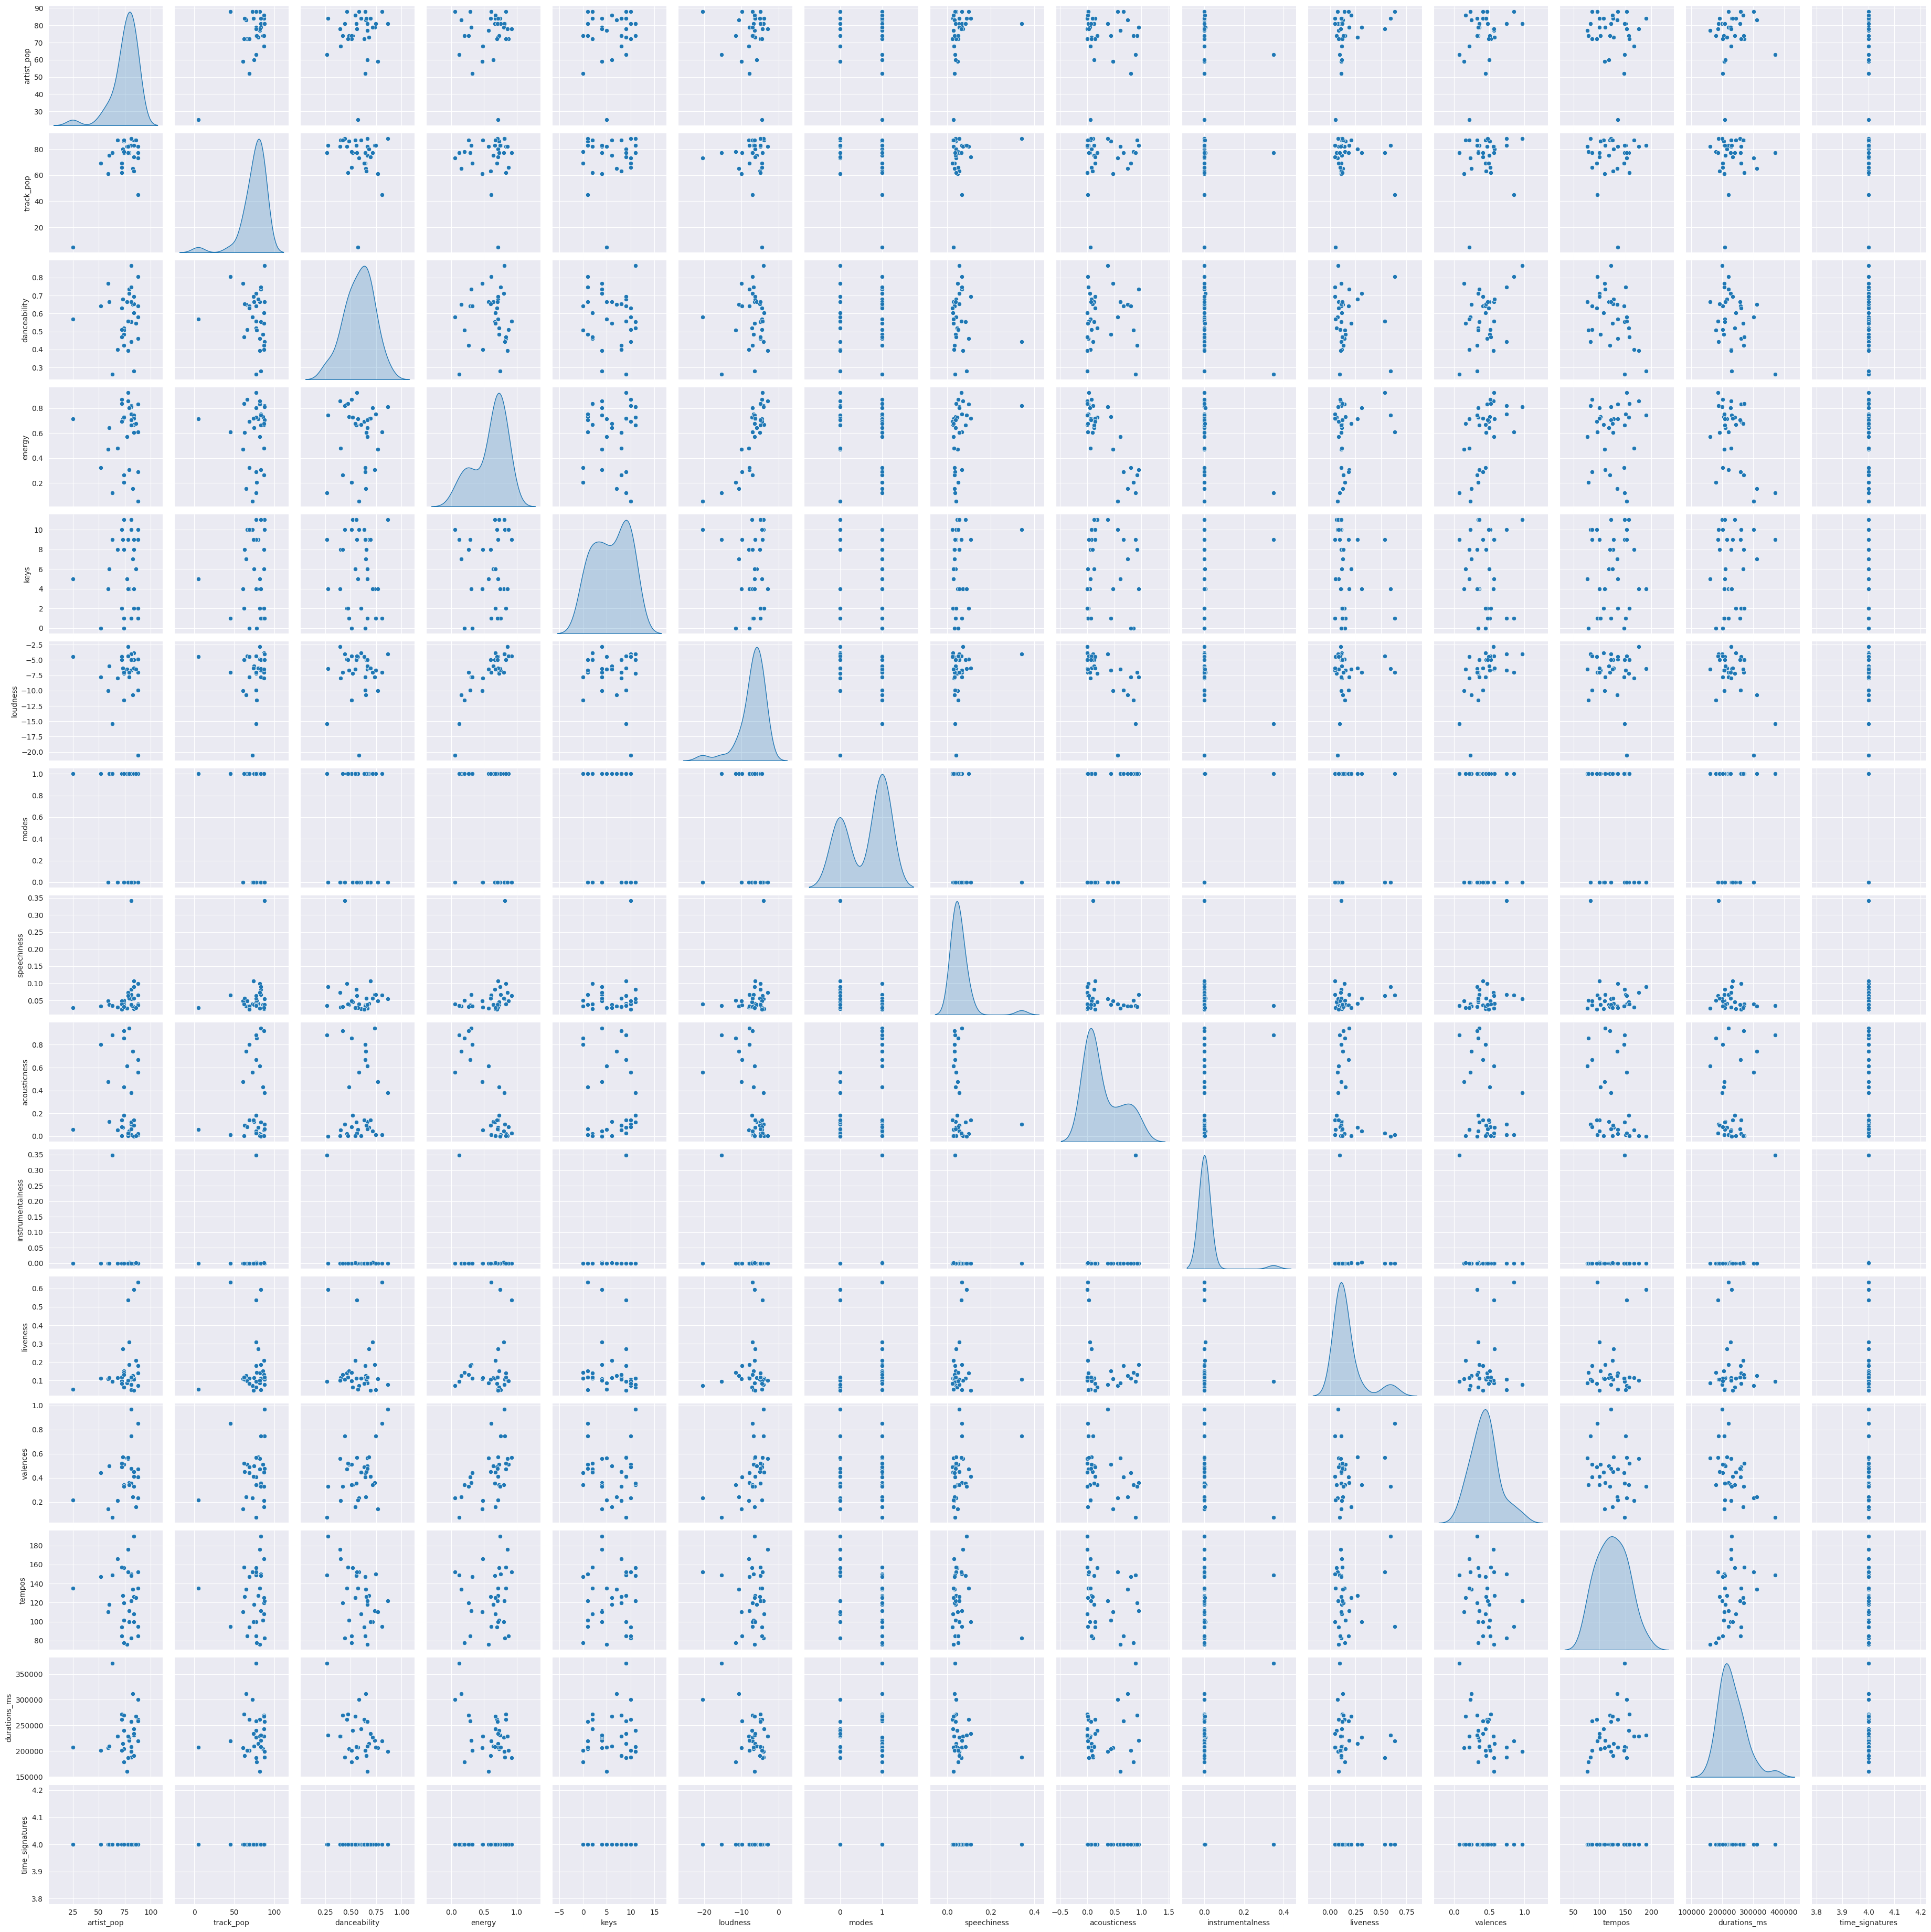

In [34]:
sns.pairplot(df_target, diag_kind='kde')
plt.show()

In [35]:
df_target.describe()

artist_pop  track_pop  danceability     energy       keys   loudness  \
count   34.000000  34.000000     34.000000  34.000000  34.000000  34.000000   
mean    75.441176  74.882353      0.581794   0.598997   5.911765  -7.030559   
std     12.492886  15.789841      0.140948   0.241653   3.646232   3.489547   
min     25.000000   5.000000      0.264000   0.054900   0.000000 -20.514000   
25%     72.250000  70.000000      0.489750   0.473000   2.500000  -7.661000   
50%     78.500000  77.500000      0.592000   0.684500   6.000000  -6.467000   
75%     83.750000  83.000000      0.664000   0.751000   9.000000  -4.889000   
max     88.000000  88.000000      0.866000   0.924000  11.000000  -2.868000   

           modes  speechiness  acousticness  instrumentalness   liveness  \
count  34.000000    34.000000     34.000000         34.000000  34.000000   
mean    0.617647     0.058471      0.284441          0.010449   0.163503   
std     0.493270     0.054306      0.327722          0.059825   0.145838   
min     0.000000     0.024200      0.000185          0.000000   0.046400   
25%     0.000000     0.034075      0.031200          0.000000   0.094875   
50%     1.000000     0.042950      0.115500          0.000000   0.113000   
75%     1.000000     0.065425      0.538250          0.000001   0.149000   
max     1.000000     0.341000      0.946000          0.349000   0.635000   

        valences      tempos   durations_ms  time_signatures  
count  34.000000   34.000000      34.000000             34.0  
mean    0.438544  124.538059  231425.000000              4.0  
std     0.196420   29.422301   42303.823942              0.0  
min     0.073500   76.023000  160097.000000              4.0  
25%     0.334000  100.414250  204751.750000              4.0  
50%     0.445000  123.493000  223615.500000              4.0  
75%     0.519250  148.525500  258096.500000              4.0  
max     0.969000  189.868000  371320.000000              4.0

### Create Target Features

In [36]:
df, tf = data_pipeline(df)
df_target, tf = data_pipeline(df_target, tf)

In [37]:
df_target.shape

(34, 608)

In [38]:
df.shape

(5737, 612)

In [39]:
df_target.head()

artist_pop  track_pop  danceability  energy  loudness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha    1.000000   0.481928         0.806  0.6080    -7.008   
6PCUP3dWmTjcTtXY02oFdT    1.000000   0.927711         0.461  0.8340    -4.868   
3di5hcvxxciiqwMH1jarhY    0.936508   0.987952         0.603  0.6700    -3.882   
3B7udSGy2PfgoCniMSb523    1.000000   0.819277         0.581  0.0549   -20.514   
5NORWMFC27ywGSZxi8uquP    0.825397   0.927711         0.664  0.5730    -6.519   

                        speechiness  acousticness  instrumentalness  liveness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha       0.0659       0.01130          0.000000    0.6350   
6PCUP3dWmTjcTtXY02oFdT       0.0989       0.02320          0.000011    0.1400   
3di5hcvxxciiqwMH1jarhY       0.0249       0.00408          0.000002    0.1120   
3B7udSGy2PfgoCniMSb523       0.0397       0.55900          0.000000    0.0718   
5NORWMFC27ywGSZxi8uquP       0.0277       0.61300          0.000363    0.0857   

                        valences   tempos  durations_ms  modes_0  modes_1  \
uris                                                                        
5LTzAKRZ2Xct8d6vVrErha     0.849   95.049      0.282843        0        1   
6PCUP3dWmTjcTtXY02oFdT     0.471  135.007      0.478437        0        1   
3di5hcvxxciiqwMH1jarhY     0.446  107.993      0.392367        1        0   
3B7udSGy2PfgoCniMSb523     0.234  152.037      0.666324        1        0   
5NORWMFC27ywGSZxi8uquP     0.566   76.023      0.000000        0        1   

                        keys_0  keys_1  keys_2  keys_4  keys_5  keys_6  \
uris                                                                     
5LTzAKRZ2Xct8d6vVrErha       0       1       0       0       0       0   
6PCUP3dWmTjcTtXY02oFdT       0       0       1       0       0       0   
3di5hcvxxciiqwMH1jarhY       0       0       1       0       0       0   
3B7udSGy2PfgoCniMSb523       0       0       0       0       0       0   
5NORWMFC27ywGSZxi8uquP       0       0       0       0       1       0   

                        keys_7  keys_8  keys_9  keys_10  keys_11  ...  \
uris                                                              ...   
5LTzAKRZ2Xct8d6vVrErha       0       0       0        0        0  ...   
6PCUP3dWmTjcTtXY02oFdT       0       0       0        0        0  ...   
3di5hcvxxciiqwMH1jarhY       0       0       0        0        0  ...   
3B7udSGy2PfgoCniMSb523       0       0       0        1        0  ...   
5NORWMFC27ywGSZxi8uquP       0       0       0        0        0  ...   

                        genre|venezolano  genre|vibe  genre|video  \
uris                                                                
5LTzAKRZ2Xct8d6vVrErha               0.0         0.0          0.0   
6PCUP3dWmTjcTtXY02oFdT               0.0         0.0          0.0   
3di5hcvxxciiqwMH1jarhY               0.0         0.0          0.0   
3B7udSGy2PfgoCniMSb523               0.0         0.0          0.0   
5NORWMFC27ywGSZxi8uquP               0.0         0.0          0.0   

                        genre|vincy  genre|vintage  genre|viral  \
uris                                                              
5LTzAKRZ2Xct8d6vVrErha          0.0            0.0          0.0   
6PCUP3dWmTjcTtXY02oFdT          0.0            0.0          0.0   
3di5hcvxxciiqwMH1jarhY          0.0            0.0          0.0   
3B7udSGy2PfgoCniMSb523          0.0            0.0          0.0   
5NORWMFC27ywGSZxi8uquP          0.0            0.0          0.0   

                        genre|virginia  genre|vocal  genre|wave  \
uris                                                              
5LTzAKRZ2Xct8d6vVrErha             0.0          0.0         0.0   
6PCUP3dWmTjcTtXY02oFdT             0.0          0.0         0.0   
3di5hcvxxciiqwMH1jarhY             0.0          0.0         0.0   
3B7udSGy2PfgoCniMSb523      

In [40]:
dif_1 = set(df_target.columns) - set(df.columns)
print(dif_1)

dif_2 = set(df.columns) - set(df_target.columns)
print(dif_2)

set()
{'keys_3', 'time_signatures_1', 'time_signatures_3', 'time_signatures_5'}


In [41]:
df.columns

Index(['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valences',
       ...
       'genre|world', 'genre|worship', 'genre|xhosa', 'genre|yacht',
       'genre|ye', 'genre|yodeling', 'genre|york', 'genre|zambian',
       'genre|zcc', 'genre|zolo'],
      dtype='object', length=612)

## Create Target Features

In [42]:
df_target = pd.read_csv('../data/target.csv', index_col=0)
df = pd.read_csv('../data/tracks.csv', index_col=0)

In [43]:
dataset_complete = pd.concat([df_target, df], axis=0)
dataset_complete = dataset_complete.reset_index(drop=True)

In [44]:
dataset_complete.head()

uris                                              names  \
0  5LTzAKRZ2Xct8d6vVrErha                                              Don't   
1  6PCUP3dWmTjcTtXY02oFdT                                 Castle on the Hill   
2  3di5hcvxxciiqwMH1jarhY                               Set Fire to the Rain   
3  3B7udSGy2PfgoCniMSb523  I See Fire - From "The Hobbit - The Desolation...   
4  5NORWMFC27ywGSZxi8uquP                                            Ophelia   

    artist_names             artist_uris  artist_pop  \
0     Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          88   
1     Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          88   
2          Adele  4dpARuHxo51G3z768sgnrY          84   
3     Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          88   
4  The Lumineers  16oZKvXb6WkQlVAjwo2Wbg          77   

                                     artist_genres  \
0       ['pop', 'singer-songwriter pop', 'uk pop']   
1       ['pop', 'singer-songwriter pop', 'uk pop']   
2    ['british soul', 'pop', 'pop soul', 'uk pop']   
3       ['pop', 'singer-songwriter pop', 'uk pop']   
4  ['folk-pop', 'modern rock', 'stomp and holler']   

                                              albums  track_pop  danceability  \
0                                x (Wembley Edition)         45         0.806   
1                                         ÷ (Deluxe)         82         0.461   
2                                                 21         87         0.603   
3  The Hobbit - The Desolation Of Smaug (Original...         73         0.581   
4                                          Cleopatra         82         0.664   

   energy  keys  loudness  modes  speechiness  acousticness  instrumentalness  \
0  0.6080     1    -7.008      1       0.0659       0.01130          0.000000   
1  0.8340     2    -4.868      1       0.0989       0.02320          0.000011   
2  0.6700     2    -3.882      0       0.0249       0.00408          0.000002   
3  0.0549    10   -20.514      0       0.0397       0.55900          0.000000   
4  0.5730     5    -6.519      1       0.0277       0.61300          0.000363   

   liveness  valences   tempos           types                     ids  \
0    0.6350     0.849   95.049  audio_features  5LTzAKRZ2Xct8d6vVrErha   
1    0.1400     0.471  135.007  audio_features  6PCUP3dWmTjcTtXY02oFdT   
2    0.1120     0.446  107.993  audio_features  3di5hcvxxciiqwMH1jarhY   
3    0.0718     0.234  152.037  audio_features  3B7udSGy2PfgoCniMSb523   
4    0.0857     0.566   76.023  audio_features  5NORWMFC27ywGSZxi8uquP   

                                         track_hrefs  \
0  https://api.spotify.com/v1/tracks/5LTzAKRZ2Xct...   
1  https://api.spotify.com/v1/tracks/6PCUP3dWmTjc...   
2  https://api.spotify.com/v1/tracks/3di5hcvxxcii...   
3  https://api.spotify.com/v1/tracks/3B7udSGy2Pfg...   
4  https://api.spotify.com/v1/tracks/5NORWMFC27yw...   

                                       analysis_urls  durations_ms  \
0  https://api.spotify.com/v1/audio-analysis/5LTz...        219840   
1  https://api.spotify.com/v1/audio-analysis/6PCU...        261154   
2  https://api.spotify.com/v1/audio-analysis/3di5...        242974   
3  https://api.spotify.com/v1/audio-analysis/3B7u...        300840   
4  https://api.spotify.com/v1/audio-analysis/5NOR...        160097   

   time_signatures    playlist_name  
0                4  Rob Performance  
1                4  Rob Performance  
2                4  Rob Performance  
3                4  Rob Performance  
4                4  Rob Performance

In [45]:
dataset_complete.shape

(5771, 26)

In [46]:
duplicates = dataset_complete['uris'].duplicated()
duplicated_rows = dataset_complete[duplicates]
print(len(duplicated_rows))

34


In [47]:
dataset_complete = dataset_complete.drop_duplicates(subset='uris', keep='first')

In [48]:
dataset_complete.shape

(5737, 26)

In [49]:
dataset_complete, _ = data_pipeline(df=dataset_complete)

In [50]:
dataset_complete.head()

artist_pop  track_pop  danceability  energy  loudness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha    0.873684       0.45         0.806  0.6080    -7.008   
6PCUP3dWmTjcTtXY02oFdT    0.873684       0.82         0.461  0.8340    -4.868   
3di5hcvxxciiqwMH1jarhY    0.831579       0.87         0.603  0.6700    -3.882   
3B7udSGy2PfgoCniMSb523    0.873684       0.73         0.581  0.0549   -20.514   
5NORWMFC27ywGSZxi8uquP    0.757895       0.82         0.664  0.5730    -6.519   

                        speechiness  acousticness  instrumentalness  liveness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha       0.0659       0.01130          0.000000    0.6350   
6PCUP3dWmTjcTtXY02oFdT       0.0989       0.02320          0.000011    0.1400   
3di5hcvxxciiqwMH1jarhY       0.0249       0.00408          0.000002    0.1120   
3B7udSGy2PfgoCniMSb523       0.0397       0.55900          0.000000    0.0718   
5NORWMFC27ywGSZxi8uquP       0.0277       0.61300          0.000363    0.0857   

                        valences   tempos  durations_ms  modes_0  modes_1  \
uris                                                                        
5LTzAKRZ2Xct8d6vVrErha     0.849   95.049      0.221924        0        1   
6PCUP3dWmTjcTtXY02oFdT     0.471  135.007      0.276152        0        1   
3di5hcvxxciiqwMH1jarhY     0.446  107.993      0.252289        1        0   
3B7udSGy2PfgoCniMSb523     0.234  152.037      0.328243        1        0   
5NORWMFC27ywGSZxi8uquP     0.566   76.023      0.143507        0        1   

                        keys_0  keys_1  keys_2  keys_3  keys_4  keys_5  \
uris                                                                     
5LTzAKRZ2Xct8d6vVrErha       0       1       0       0       0       0   
6PCUP3dWmTjcTtXY02oFdT       0       0       1       0       0       0   
3di5hcvxxciiqwMH1jarhY       0       0       1       0       0       0   
3B7udSGy2PfgoCniMSb523       0       0       0       0       0       0   
5NORWMFC27ywGSZxi8uquP       0       0       0       0       0       1   

                        keys_6  keys_7  keys_8  keys_9  keys_10  ...  \
uris                                                             ...   
5LTzAKRZ2Xct8d6vVrErha       0       0       0       0        0  ...   
6PCUP3dWmTjcTtXY02oFdT       0       0       0       0        0  ...   
3di5hcvxxciiqwMH1jarhY       0       0       0       0        0  ...   
3B7udSGy2PfgoCniMSb523       0       0       0       0        1  ...   
5NORWMFC27ywGSZxi8uquP       0       0       0       0        0  ...   

                        genre|venezolano  genre|vibe  genre|video  \
uris                                                                
5LTzAKRZ2Xct8d6vVrErha               0.0         0.0          0.0   
6PCUP3dWmTjcTtXY02oFdT               0.0         0.0          0.0   
3di5hcvxxciiqwMH1jarhY               0.0         0.0          0.0   
3B7udSGy2PfgoCniMSb523               0.0         0.0          0.0   
5NORWMFC27ywGSZxi8uquP               0.0         0.0          0.0   

                        genre|vincy  genre|vintage  genre|viral  \
uris                                                              
5LTzAKRZ2Xct8d6vVrErha          0.0            0.0          0.0   
6PCUP3dWmTjcTtXY02oFdT          0.0            0.0          0.0   
3di5hcvxxciiqwMH1jarhY          0.0            0.0          0.0   
3B7udSGy2PfgoCniMSb523          0.0            0.0          0.0   
5NORWMFC27ywGSZxi8uquP          0.0            0.0          0.0   

                        genre|virginia  genre|vocal  genre|wave  \
uris                                                              
5LTzAKRZ2Xct8d6vVrErha             0.0          0.0         0.0   
6PCUP3dWmTjcTtXY02oFdT             0.0          0.0         0.0   
3di5hcvxxciiqwMH1jarhY             0.0          0.0         0.0   
3B7udSGy2PfgoCniMSb523             

In [51]:
dataset_complete.shape

(5737, 612)

## Remove Tracks already in Target

In [52]:
dataset_complete.index

Index(['5LTzAKRZ2Xct8d6vVrErha', '6PCUP3dWmTjcTtXY02oFdT',
       '3di5hcvxxciiqwMH1jarhY', '3B7udSGy2PfgoCniMSb523',
       '5NORWMFC27ywGSZxi8uquP', '5FwlCxV2Q4xjTywLsD3Kxe',
       '4Of7rzpRpV1mWRbhp5rAqG', '3U0UzEdzd45T81FHdPPbfC',
       '7yq4Qj7cqayVTp3FF9CWbm', '6fNhZRFEkBfgW39W3wKARJ',
       ...
       '3L170JRykNjmZ6yT7VqVz0', '0liqgDxxKqACG9kponhjfn',
       '1ZMUZYIlsTnQbOrgbpgalr', '55EM7fFmFL7nWuSauXmNPq',
       '3sfYpzimgCeLiPIshgbIRn', '3NDxc7r19AvChQiVOdUMoK',
       '1B0JPbHveYeKoEfOYep3Ja', '189f0Iy7MlhflRfDi82QP0',
       '5vY3kwXfrDxNu8XzsbMhZi', '68wmnF8Q5rC6EMnBJ9Qp5a'],
      dtype='object', name='uris', length=5737)

In [53]:
def unique_tracks(df, df_target):
    df = df.drop(df_target['uris'], errors='ignore')
    return df 

In [54]:
def extract_target(df, df_target):
    target_uris = df_target['uris'].tolist()
    return df[df.index.isin(target_uris)]

In [55]:
target_features = extract_target(dataset_complete, df_target)

In [56]:
target_features.head()

artist_pop  track_pop  danceability  energy  loudness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha    0.873684       0.45         0.806  0.6080    -7.008   
6PCUP3dWmTjcTtXY02oFdT    0.873684       0.82         0.461  0.8340    -4.868   
3di5hcvxxciiqwMH1jarhY    0.831579       0.87         0.603  0.6700    -3.882   
3B7udSGy2PfgoCniMSb523    0.873684       0.73         0.581  0.0549   -20.514   
5NORWMFC27ywGSZxi8uquP    0.757895       0.82         0.664  0.5730    -6.519   

                        speechiness  acousticness  instrumentalness  liveness  \
uris                                                                            
5LTzAKRZ2Xct8d6vVrErha       0.0659       0.01130          0.000000    0.6350   
6PCUP3dWmTjcTtXY02oFdT       0.0989       0.02320          0.000011    0.1400   
3di5hcvxxciiqwMH1jarhY       0.0249       0.00408          0.000002    0.1120   
3B7udSGy2PfgoCniMSb523       0.0397       0.55900          0.000000    0.0718   
5NORWMFC27ywGSZxi8uquP       0.0277       0.61300          0.000363    0.0857   

                        valences   tempos  durations_ms  modes_0  modes_1  \
uris                                                                        
5LTzAKRZ2Xct8d6vVrErha     0.849   95.049      0.221924        0        1   
6PCUP3dWmTjcTtXY02oFdT     0.471  135.007      0.276152        0        1   
3di5hcvxxciiqwMH1jarhY     0.446  107.993      0.252289        1        0   
3B7udSGy2PfgoCniMSb523     0.234  152.037      0.328243        1        0   
5NORWMFC27ywGSZxi8uquP     0.566   76.023      0.143507        0        1   

                        keys_0  keys_1  keys_2  keys_3  keys_4  keys_5  \
uris                                                                     
5LTzAKRZ2Xct8d6vVrErha       0       1       0       0       0       0   
6PCUP3dWmTjcTtXY02oFdT       0       0       1       0       0       0   
3di5hcvxxciiqwMH1jarhY       0       0       1       0       0       0   
3B7udSGy2PfgoCniMSb523       0       0       0       0       0       0   
5NORWMFC27ywGSZxi8uquP       0       0       0       0       0       1   

                        keys_6  keys_7  keys_8  keys_9  keys_10  ...  \
uris                                                             ...   
5LTzAKRZ2Xct8d6vVrErha       0       0       0       0        0  ...   
6PCUP3dWmTjcTtXY02oFdT       0       0       0       0        0  ...   
3di5hcvxxciiqwMH1jarhY       0       0       0       0        0  ...   
3B7udSGy2PfgoCniMSb523       0       0       0       0        1  ...   
5NORWMFC27ywGSZxi8uquP       0       0       0       0        0  ...   

                        genre|venezolano  genre|vibe  genre|video  \
uris                                                                
5LTzAKRZ2Xct8d6vVrErha               0.0         0.0          0.0   
6PCUP3dWmTjcTtXY02oFdT               0.0         0.0          0.0   
3di5hcvxxciiqwMH1jarhY               0.0         0.0          0.0   
3B7udSGy2PfgoCniMSb523               0.0         0.0          0.0   
5NORWMFC27ywGSZxi8uquP               0.0         0.0          0.0   

                        genre|vincy  genre|vintage  genre|viral  \
uris                                                              
5LTzAKRZ2Xct8d6vVrErha          0.0            0.0          0.0   
6PCUP3dWmTjcTtXY02oFdT          0.0            0.0          0.0   
3di5hcvxxciiqwMH1jarhY          0.0            0.0          0.0   
3B7udSGy2PfgoCniMSb523          0.0            0.0          0.0   
5NORWMFC27ywGSZxi8uquP          0.0            0.0          0.0   

                        genre|virginia  genre|vocal  genre|wave  \
uris                                                              
5LTzAKRZ2Xct8d6vVrErha             0.0          0.0         0.0   
6PCUP3dWmTjcTtXY02oFdT             0.0          0.0         0.0   
3di5hcvxxciiqwMH1jarhY             0.0          0.0         0.0   
3B7udSGy2PfgoCniMSb523             

In [57]:
target_features.shape

(34, 612)

In [58]:
data_features = unique_tracks(dataset_complete, df_target)

In [59]:
data_features.shape

(5703, 612)

The track dataset and the target are now the exact same dimension. 

## Summarize Target Playlist into a single vector

The source I am following sums the values and then performs a cosine similarity measurement to determine similarity. 
However, I think that averaging the playlist features may allow for a better similarity metric/

In [60]:
target_vec_mean = target_features.mean(axis=0)
target_vec_mean = target_vec_mean.to_numpy().reshape(1, -1)

target_vec_sum = target_features.sum(axis=0)
target_vec_sum = target_vec_sum.to_numpy().reshape(1, -1)

In [61]:
target_vec_mean

array([[ 7.41486068e-01,  7.48823529e-01,  5.81794118e-01,
         5.98997059e-01, -7.03055882e+00,  5.84705882e-02,
         2.84441029e-01,  1.04490747e-02,  1.63502941e-01,
         4.38544118e-01,  1.24538059e+02,  2.37130181e-01,
         3.82352941e-01,  6.17647059e-01,  5.88235294e-02,
         1.17647059e-01,  8.82352941e-02,  0.00000000e+00,
         1.47058824e-01,  5.88235294e-02,  5.88235294e-02,
         2.94117647e-02,  8.82352941e-02,  1.47058824e-01,
         1.17647059e-01,  8.82352941e-02,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  2.49140374e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [62]:
target_vec_mean.shape

(1, 612)

In [63]:
target_vec_sum

array([[ 2.52105263e+01,  2.54600000e+01,  1.97810000e+01,
         2.03659000e+01, -2.39039000e+02,  1.98800000e+00,
         9.67099500e+00,  3.55268540e-01,  5.55910000e+00,
         1.49105000e+01,  4.23429400e+03,  8.06242617e+00,
         1.30000000e+01,  2.10000000e+01,  2.00000000e+00,
         4.00000000e+00,  3.00000000e+00,  0.00000000e+00,
         5.00000000e+00,  2.00000000e+00,  2.00000000e+00,
         1.00000000e+00,  3.00000000e+00,  5.00000000e+00,
         4.00000000e+00,  3.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.40000000e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  8.47077272e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

## Similarity

Due to the different methods of target playlist summarization, both cosine similarity and Euclidian distance will be calculated. 

In [64]:
data_matrix = data_features.to_numpy()

Calculate cosine similarity and euclidian distance of vector mean

In [65]:
mean_cos_sim = cosine_similarity(data_matrix, target_vec_mean)
print(mean_cos_sim)

mean_euc_sim = euclidean_distances(data_matrix, target_vec_mean)
print(mean_euc_sim)
print(mean_euc_sim.shape)

[[0.99933253]
 [0.99990935]
 [0.99967897]
 ...
 [0.9998541 ]
 [0.99988294]
 [0.99897771]]
[[19.72703658]
 [ 4.85366719]
 [16.91886098]
 ...
 [ 2.63533411]
 [ 7.67509217]
 [ 6.89499708]]
(5703, 1)


In [66]:
sum_cos_sim = cosine_similarity(data_matrix, target_vec_sum)
print(sum_cos_sim)

sum_euc_sim = euclidean_distances(data_matrix, target_vec_sum)
print(sum_euc_sim)

[[0.99933253]
 [0.99990935]
 [0.99967897]
 ...
 [0.9998541 ]
 [0.99988294]
 [0.99897771]]
[[4136.18806272]
 [4121.41544232]
 [4133.53582868]
 ...
 [4118.4263278 ]
 [4109.43582152]
 [4121.0606535 ]]


## Store rankings

In [67]:
track_uris = data_features.index.tolist()

In [68]:
rec_df = pd.DataFrame.from_dict({'uris': track_uris, 
                                 'mean_cos_sim': mean_cos_sim.T.tolist()[0], 
                                 'mean_euc_sim': mean_euc_sim.T.tolist()[0], 
                                 'sum_cos_sim': sum_cos_sim.T.tolist()[0], 
                                 'sum_euc_sim': sum_euc_sim.T.tolist()[0]})
rec_df = rec_df.set_index('uris')

In [69]:
rec_df.head()

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim
uris                                                                        
3h0tEwAyOCQDa4X8NEcy0Q      0.999333     19.727037     0.999333  4136.188063
21VnSlwtvNKUFFHHKqt7fI      0.999909      4.853667     0.999909  4121.415442
7yH9SbrDQfNIh89ACCR7Ib      0.999679     16.918861     0.999679  4133.535829
7qhPd5HqLrCVpCWvpy8Hrh      0.999914      4.765289     0.999914  4121.336993
2sqbxX6StkXMdSolVicfgV      0.999680      8.924148     0.999680  4125.265139

In [70]:
rec_df.describe()

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim
count   5703.000000   5703.000000  5703.000000  5703.000000
mean       0.992024     25.819090     0.992024  4124.503269
std        0.023130     18.418189     0.023130    28.637365
min        0.704146      1.558668     0.704146  4011.196097
25%        0.998881     10.067505     0.998881  4106.512138
50%        0.999667     22.728074     0.999667  4124.458884
75%        0.999831     37.696935     0.999831  4146.014253
max        0.999962    105.716107     0.999962  4208.669554

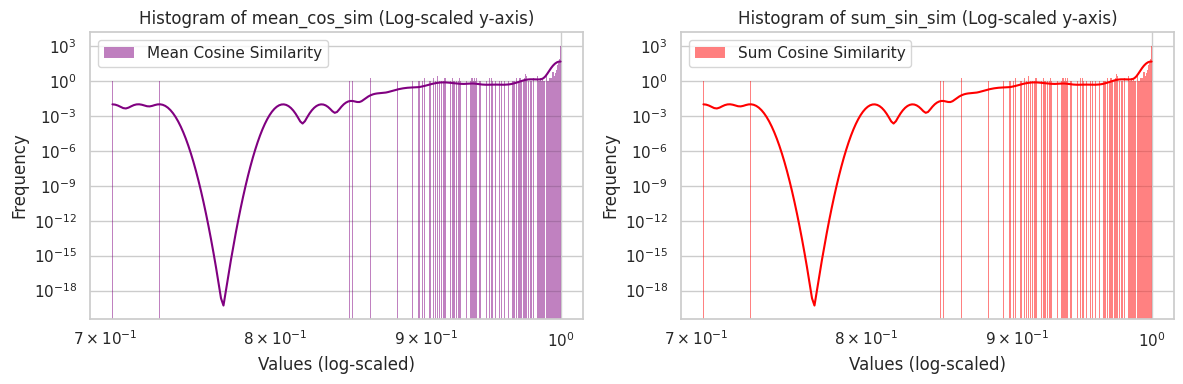

In [71]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
g = sns.histplot(data=rec_df, x='mean_cos_sim', kde=True, color='purple', label='Mean Cosine Similarity', ax=axes[0])
h = sns.histplot(data=rec_df, x='sum_cos_sim', kde=True, color='red', label='Sum Cosine Similarity', ax=axes[1])

axes[0].set_yscale('log')
axes[1].set_yscale('log')

axes[0].set_xscale('log')
axes[1].set_xscale('log')

axes[0].set_xlabel('Values (log-scaled)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of mean_cos_sim (Log-scaled y-axis)')
axes[0].legend()

axes[1].set_xlabel('Values (log-scaled)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of sum_sin_sim (Log-scaled y-axis)')
axes[1].legend()

plt.tight_layout()
plt.show()

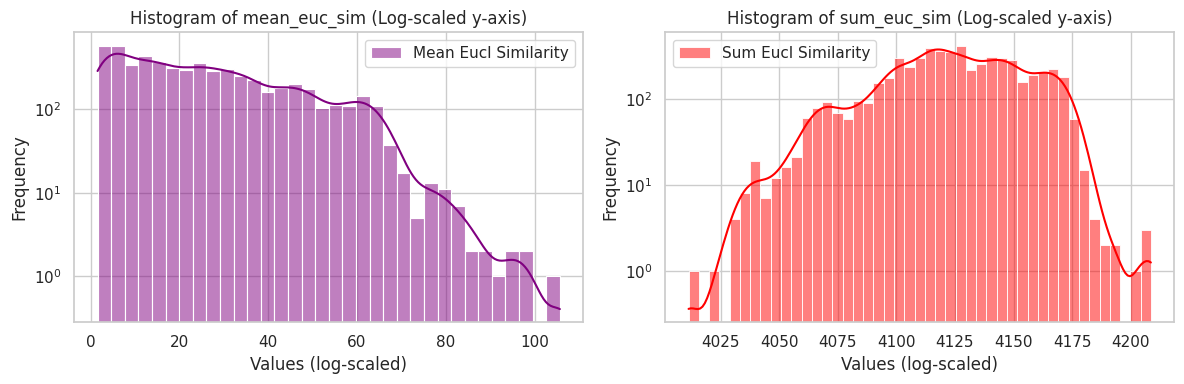

In [72]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
g = sns.histplot(data=rec_df, x='mean_euc_sim', kde=True, color='purple', label='Mean Eucl Similarity', ax=axes[0])
h = sns.histplot(data=rec_df, x='sum_euc_sim', kde=True, color='red', label='Sum Eucl Similarity', ax=axes[1])

axes[0].set_yscale('log')
axes[1].set_yscale('log')


axes[0].set_xlabel('Values (log-scaled)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of mean_euc_sim (Log-scaled y-axis)')
axes[0].legend()

axes[1].set_xlabel('Values (log-scaled)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Histogram of sum_euc_sim (Log-scaled y-axis)')
axes[1].legend()

plt.tight_layout()
plt.show()

## Recommendations

In [73]:
df = pd.read_csv('../data/tracks.csv', index_col=0)
df = df.set_index('uris', drop=True)

In [74]:
cosine_sim_df = rec_df.sort_values(by='mean_cos_sim', ascending=False)
euc_sim = rec_df.sort_values(by='mean_euc_sim', ascending=True)

In [75]:
cosine_sim_df.head()

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim
uris                                                                        
3qoftcUZaUOncvIYjFSPdE      0.999962     39.543598     0.999962  4077.321510
1GwMQaZz6Au3QLDbjbMdme      0.999960     39.539148     0.999960  4077.327800
2Eeur20xVqfUoM3Q7EFPFt      0.999958     23.471124     0.999958  4093.407290
4ABYxlb92WBIjHu7TIKmml      0.999955     23.321135     0.999955  4093.561006
7dW84mWkdWE5a6lFWxJCBG      0.999954     21.455488     0.999954  4095.429655

In [76]:
euc_sim.head()

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim
uris                                                                        
4IQkfUsrwXol38VV3U7t7T      0.999930      1.558668     0.999930  4116.342086
2QN9zL3SzXdGqqmXO68gFp      0.999927      1.562226     0.999927  4117.266326
5Bl32FoKm0kTiMe6hcRNkV      0.999929      1.564244     0.999929  4116.383815
3GpbwCm3YxiWDvy29Uo3vP      0.999925      1.592290     0.999925  4116.400906
1A3tuE6ti9qoZDwB3LB0t2      0.999919      1.594597     0.999919  4116.964388

### Cosine Similarity Rec Sys

In [77]:
cos_top = cosine_sim_df.head(50)
cos_rec = cos_top.merge(df, left_index=True, right_index=True)
cos_rec.head(30)

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim  \
uris                                                                           
3qoftcUZaUOncvIYjFSPdE      0.999962     39.543598     0.999962  4077.321510   
1GwMQaZz6Au3QLDbjbMdme      0.999960     39.539148     0.999960  4077.327800   
2Eeur20xVqfUoM3Q7EFPFt      0.999958     23.471124     0.999958  4093.407290   
4ABYxlb92WBIjHu7TIKmml      0.999955     23.321135     0.999955  4093.561006   
7dW84mWkdWE5a6lFWxJCBG      0.999954     21.455488     0.999954  4095.429655   
4A2LfnduSTsE8u0ecYROxE      0.999954     45.629802     0.999954  4071.239198   
02VBYrHfVwfEWXk5DXyf0T      0.999951     23.610419     0.999951  4093.274478   
3yNJkriPzWjkkDAWHIAVUq      0.999951     35.321616     0.999951  4081.553420   
59HjlYCeBsxdI0fcm3zglw      0.999951     15.578137     0.999951  4101.323299   
4d1CG5ei1E2vGbvmgf5KKv      0.999951     19.614191     0.999951  4097.277841   
5jQVx40dbpDsstcwlhpk9u      0.999949     36.709375     0.999949  4080.166031   
7861kBrZ5aw7o4NfggcyYW      0.999949      3.625590     0.999949  4113.452869   
3i058E8uxTsYqJ5NWZzqSj      0.999949     17.492739     0.999949  4099.406033   
0CtuA9sDnOAU3NM8bHIMyu      0.999949     28.635682     0.999949  4088.246074   
5pcjystBtalYeqaiXCcgEY      0.999948     18.256361     0.999948  4098.641912   
1Ov37jtRQ2YNAe8HzfczkL      0.999947     15.581501     0.999947  4101.324517   
4AYtqFyFbX0Xkc2wtcygTr      0.999947     83.136383     0.999947  4033.730890   
5CscrLqFBgPfZR8fGtikov      0.999947      8.806130     0.999947  4108.141392   
2RFkLlsHRjcnZA0fHCOTKA      0.999947     18.375837     0.999947  4098.523207   
7bbDRMb1AIjb8cWztwm8MS      0.999947     40.514857     0.999947  4076.360754   
2RlgNHKcydI9sayD2Df2xp      0.999946     53.336215     0.999946  4063.535328   
33ovGnOeJfoSXRyL3dZhgf      0.999946     14.902814     0.999946  4102.007715   
6zsk6uF3MxfIeHPlubKBvR      0.999945     53.406709     0.999945  4063.465391   
47ohYW8e7dxCYn9qbUMBCI      0.999945      2.472699     0.999945  4114.752612   
1L0OmJV0LnPDWuHCIGmBV6      0.999945     25.677911     0.999945  4091.209796   
7xapw9Oy21WpfEcib2ErSA      0.999945     37.544010     0.999945  4079.333922   
5e9TFTbltYBg2xThimr0rU      0.999945     27.115565     0.999945  4089.770624   
7mjSHL2Eb0kAwiKbvNNyD9      0.999945     28.394187     0.999945  4088.490942   
013AWvizllIUEC2FOBzOnh      0.999945     43.647618     0.999945  4073.227979   
63T7DJ1AFDD6Bn8VzG6JE8      0.999944     34.262171     0.999944  4082.618480   

                                                                    names  \
uris                                                                        
3qoftcUZaUOncvIYjFSPdE                                          Bejeweled   
1GwMQaZz6Au3QLDbjbMdme                              Call It What You Want   
2Eeur20xVqfUoM3Q7EFPFt                    the last great american dynasty   
4ABYxlb92WBIjHu7TIKmml  Castles Crumbling (feat. Hayley Williams) (Tay...   
7dW84mWkdWE5a6lFWxJCBG                               ‘tis the damn season   
4A2LfnduSTsE8u0ecYROxE                                    You Are In Love   
02VBYrHfVwfEWXk5DXyf0T                                Leave The Door Open   
3yNJkriPzWjkkDAWHIAVUq                            Ours (Taylor’s Version)   
59HjlYCeBsxdI0fcm3zglw                                     Wildest Dreams   
4d1CG5ei1E2vGbvmgf5KKv                       This Love (Taylor’s Version)   
5jQVx40dbpDsstcwlhpk9u                                       trust issues   
7861kBrZ5aw7o4NfggcyYW                       It's Not Right But It's Okay   
3i058E8uxTsYqJ5NWZzqSj                                       Little Freak   
0CtuA9sDnOAU3NM8bHIMyu                                        Wassup Gway   
5pcjystBtalYeqaiXCcgEY  You All Over Me (feat. Maren Morris) (Taylor’s...   
1Ov37jtRQ2YNAe8HzfczkL                  Wildest Dreams (Taylor's Version)   
4AYtqFyFbX0Xkc2wtcygTr          Soon You’ll Get Better (feat. The Chicks)   


In [78]:
cos_rec.tail(30)

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim  \
uris                                                                           
2RlgNHKcydI9sayD2Df2xp      0.999946     53.336215     0.999946  4063.535328   
33ovGnOeJfoSXRyL3dZhgf      0.999946     14.902814     0.999946  4102.007715   
6zsk6uF3MxfIeHPlubKBvR      0.999945     53.406709     0.999945  4063.465391   
47ohYW8e7dxCYn9qbUMBCI      0.999945      2.472699     0.999945  4114.752612   
1L0OmJV0LnPDWuHCIGmBV6      0.999945     25.677911     0.999945  4091.209796   
7xapw9Oy21WpfEcib2ErSA      0.999945     37.544010     0.999945  4079.333922   
5e9TFTbltYBg2xThimr0rU      0.999945     27.115565     0.999945  4089.770624   
7mjSHL2Eb0kAwiKbvNNyD9      0.999945     28.394187     0.999945  4088.490942   
013AWvizllIUEC2FOBzOnh      0.999945     43.647618     0.999945  4073.227979   
63T7DJ1AFDD6Bn8VzG6JE8      0.999944     34.262171     0.999944  4082.618480   
2gjidmxtA1pyj2HYrdOTG1      0.999944     43.577389     0.999944  4073.298450   
3nqQXoyQOWXiESFLlDF1hG      0.999944      6.737395     0.999944  4110.247270   
42TMa2hgBNjte4uV7jNCnQ      0.999944     55.787469     0.999944  4061.084991   
1TXbPx0WUaJM0fjDVs4wCD      0.999943     17.435598     0.999943  4099.470521   
5wANPM4fQCJwkGd4rN57mH      0.999942     19.468549     0.999942  4097.432561   
69QIVIjPMnI1ABLBqh9P1b      0.999942     51.409706     0.999942  4065.464785   
4wP6mzWZC94dYmU6OYeljf      0.999942      3.786782     0.999942  4113.314486   
36AWdhZIGLUTkWpJDhe7va      0.999942     19.505067     0.999942  4097.396706   
4at3d5QWnlibMVN75ECDrp      0.999941     67.717988     0.999941  4049.153886   
7EZC6E7UjZe63f1jRmkWxt      0.999941     42.451672     0.999941  4074.426715   
2ZKXBim3pDX8WTHmyFFUO6      0.999940      4.818525     0.999940  4121.475337   
3LmvfNUQtglbTrydsdIqFU      0.999940     15.546739     0.999940  4101.368678   
0JFUAuI5jrh7xHaY0kRFW1      0.999939     49.986086     0.999939  4066.890698   
4rHIfYRQw6ittRQXAlurk0      0.999939     45.679764     0.999939  4071.198564   
731oIHe1EeEyTEwdtY0lRj      0.999939     25.422959     0.999939  4091.470614   
741UUVE2kuITl0c6zuqqbO      0.999938     19.645835     0.999938  4097.259118   
0m3hslcOQomyJh8Mz7hdrX      0.999938      9.737316     0.999938  4107.217851   
1EuWkVH5tfxmvVNGVnNu1Y      0.999938     12.251382     0.999938  4104.683722   
4GnjXzJfmPcVEt0S7zIS9L      0.999938      8.636294     0.999938  4125.377666   
38EhHqsV5NX9JrC2D2qXNI      0.999937     63.642714     0.999937  4053.231973   

                                                                    names  \
uris                                                                        
2RlgNHKcydI9sayD2Df2xp                                       Mr. Blue Sky   
33ovGnOeJfoSXRyL3dZhgf  Nothing Without You - Live At The Barnyard The...   
6zsk6uF3MxfIeHPlubKBvR                                    Get Ur Freak On   
47ohYW8e7dxCYn9qbUMBCI                  Christmas (Baby Please Come Home)   
1L0OmJV0LnPDWuHCIGmBV6                             On The Radar Freestyle   
7xapw9Oy21WpfEcib2ErSA                                          Mistletoe   
5e9TFTbltYBg2xThimr0rU                          The Chain - 2004 Remaster   
7mjSHL2Eb0kAwiKbvNNyD9                                         Wild World   
013AWvizllIUEC2FOBzOnh                                 Truly Madly Deeply   
63T7DJ1AFDD6Bn8VzG6JE8                                    Paint It, Black   
2gjidmxtA1pyj2HYrdOTG1                                  I Want You Around   
3nqQXoyQOWXiESFLlDF1hG                          Unholy (feat. Kim Petras)   
42TMa2hgBNjte4uV7jNCnQ                                             Baller   
1TXbPx0WUaJM0fjDVs4wCD                 Hands On Me (feat. Meghan Trainor)   
5wANPM4fQCJwkGd4rN57mH                                    drivers license   
69QIVIjPMnI1ABLBqh9P1b                                            Twisted   
4wP6mzWZC94dYmU6OYeljf                                        Maria Maria   


### Euclidian Similarity

In [79]:
euc_top = euc_sim.head(50)
euc_rec = euc_top.merge(df, left_index=True, right_index=True)
euc_rec.head(30)

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim  \
uris                                                                           
4IQkfUsrwXol38VV3U7t7T      0.999930      1.558668     0.999930  4116.342086   
2QN9zL3SzXdGqqmXO68gFp      0.999927      1.562226     0.999927  4117.266326   
5Bl32FoKm0kTiMe6hcRNkV      0.999929      1.564244     0.999929  4116.383815   
3GpbwCm3YxiWDvy29Uo3vP      0.999925      1.592290     0.999925  4116.400906   
1A3tuE6ti9qoZDwB3LB0t2      0.999919      1.594597     0.999919  4116.964388   
4U45aEWtQhrm8A5mxPaFZ7      0.999920      1.625956     0.999920  4116.463426   
0fBm16QCdtqEvrcT3b9H7E      0.999929      1.636751     0.999929  4116.161689   
48Jf12YHPBCAfAzi255Rvr      0.999920      1.645238     0.999920  4116.381967   
7rF8qrVzCGu9gVHO1Q9RdJ      0.999919      1.653912     0.999919  4116.387618   
6sxptembJVty4sNtcPMAVz      0.999914      1.685224     0.999914  4116.467035   
2gsB29hjEctVqLCtg7HsQS      0.999914      1.687329     0.999914  4116.449517   
2zBDKzqa6sdxeI0fC6OWIC      0.999914      1.689606     0.999914  4116.435631   
5OSGdSxtulzlzdPdK2MQJC      0.999915      1.706675     0.999915  4117.378672   
7mFj0LlWtEJaEigguaWqYh      0.999914      1.723470     0.999914  4117.391164   
3850dYVgOFIXJh5U4BFEWH      0.999914      1.723515     0.999914  4116.320894   
0DRJILxCmuHsrJpYYqXMed      0.999911      1.734107     0.999911  4117.344925   
6HBRLaSQ7NB8MNlaqzYen1      0.999906      1.744707     0.999906  4116.539010   
591wGDMg5Bnus2laEIK2Ac      0.999911      1.747959     0.999911  4117.408083   
2IO1qCsafE2xApON7VDokz      0.999906      1.748174     0.999906  4116.490843   
08D2l1z7iGDMbHbb227ydx      0.999911      1.754967     0.999911  4117.407541   
6NB2npCHsGXQ059pMhXJzl      0.999911      1.760774     0.999911  4116.288834   
4EzkcqltSOxYE2lstuLOFs      0.999908      1.765893     0.999908  4116.359366   
70RKbdb0CVDUA9PjefUUIJ      0.999908      1.767988     0.999908  4117.360549   
6ulEymrJ2Azx1uo3YHSE5w      0.999905      1.771243     0.999905  4117.274749   
2DSQvvaojC1yu5phfWDKuB      0.999907      1.771804     0.999907  4117.345471   
3YgtkOxZsTuaZdL8McA1FQ      0.999906      1.780889     0.999906  4117.343689   
4Xz2mxHREzWiEr0AyCJuU6      0.999905      1.799502     0.999905  4117.405654   
5OLSGox6JVpAyEQuoSYRcs      0.999901      1.821267     0.999901  4116.365172   
0XPsOSYzDJZJArevQNm2AR      0.999897      1.828524     0.999897  4116.506047   
3NDxc7r19AvChQiVOdUMoK      0.999899      1.834308     0.999899  4117.337244   

                                                                    names  \
uris                                                                        
4IQkfUsrwXol38VV3U7t7T  Run (feat. Ed Sheeran) (Taylor’s Version) (Fro...   
2QN9zL3SzXdGqqmXO68gFp            Somebody's Watching Me - Single Version   
5Bl32FoKm0kTiMe6hcRNkV                                       Body on Fire   
3GpbwCm3YxiWDvy29Uo3vP                                        Right Round   
1A3tuE6ti9qoZDwB3LB0t2                       I Think I Like When It Rains   
4U45aEWtQhrm8A5mxPaFZ7                                             Vienna   
0fBm16QCdtqEvrcT3b9H7E                                         Holy Hands   
48Jf12YHPBCAfAzi255Rvr                                           Redlight   
7rF8qrVzCGu9gVHO1Q9RdJ                                               Numb   
6sxptembJVty4sNtcPMAVz                          Man! I Feel Like A Woman!   
2gsB29hjEctVqLCtg7HsQS                               Never Give Up On You   
2zBDKzqa6sdxeI0fC6OWIC                                           Fly Away   
5OSGdSxtulzlzdPdK2MQJC                                          Esta Vida   
7mFj0LlWtEJaEigguaWqYh                                       Sweetest Pie   
3850dYVgOFIXJh5U4BFEWH                                            Hung Up   
0DRJILxCmuHsrJpYYqXMed                                                711   
6HBRLaSQ7NB8MNlaqzYen1                         What My World Spins Around   


In [80]:
euc_rec.tail(30)

mean_cos_sim  mean_euc_sim  sum_cos_sim  sum_euc_sim  \
uris                                                                           
6NB2npCHsGXQ059pMhXJzl      0.999911      1.760774     0.999911  4116.288834   
4EzkcqltSOxYE2lstuLOFs      0.999908      1.765893     0.999908  4116.359366   
70RKbdb0CVDUA9PjefUUIJ      0.999908      1.767988     0.999908  4117.360549   
6ulEymrJ2Azx1uo3YHSE5w      0.999905      1.771243     0.999905  4117.274749   
2DSQvvaojC1yu5phfWDKuB      0.999907      1.771804     0.999907  4117.345471   
3YgtkOxZsTuaZdL8McA1FQ      0.999906      1.780889     0.999906  4117.343689   
4Xz2mxHREzWiEr0AyCJuU6      0.999905      1.799502     0.999905  4117.405654   
5OLSGox6JVpAyEQuoSYRcs      0.999901      1.821267     0.999901  4116.365172   
0XPsOSYzDJZJArevQNm2AR      0.999897      1.828524     0.999897  4116.506047   
3NDxc7r19AvChQiVOdUMoK      0.999899      1.834308     0.999899  4117.337244   
4NUmZ5svM1Bbmaz5udqUeJ      0.999896      1.838181     0.999896  4116.475970   
5c6lM2zjAF6MFoD8C1hiBr      0.999897      1.854048     0.999897  4116.373340   
7LTCmtMpf3JPfBE8gAl64z      0.999895      1.855714     0.999895  4116.447331   
46nvQpUDsxpS08UTFOeKTA      0.999903      1.863281     0.999903  4117.546109   
61Hn9ssQkVEWq4ZmPwHyzd      0.999895      1.874157     0.999895  4117.374710   
4ThxV3T887uIHatv3QPMhO      0.999893      1.874309     0.999893  4116.442922   
5uEYRdEIh9Bo4fpjDd4Na9      0.999894      1.874879     0.999894  4116.412879   
5cJZzpcqdwkUvD2f88wcgS      0.999896      1.882311     0.999896  4117.418892   
1TfqLAPs4K3s2rJMoCokcS      0.999898      1.891890     0.999898  4116.217611   
2MAjcMaiYJdwFT3oAYLo03      0.999891      1.896206     0.999891  4116.405434   
5p0aallQlnYrQmHI10BASz      0.999892      1.898584     0.999892  4117.350046   
4VVzgTike7FW8OiUIDN7hk      0.999892      1.912209     0.999892  4117.416695   
2Q5q1q01KOdHt5fM00WUJ8      0.999887      1.932478     0.999887  4117.337558   
1ZMUZYIlsTnQbOrgbpgalr      0.999934      1.937957     0.999934  4115.552093   
51Msclnf6boUX26DmZvViX      0.999897      1.949712     0.999897  4117.633539   
6pyXckwhvsn3o8ITLymLDU      0.999889      1.957314     0.999889  4116.248481   
5ozhK7GvUKSNSr1LrclYM2      0.999884      1.961123     0.999884  4116.374965   
6Ea2oEzysv4UECGNxL1IEW      0.999886      1.969668     0.999886  4116.284366   
2oOsMm1b1DchtPDNEjLBcm      0.999884      1.972564     0.999884  4117.410558   
0bqV6cwBAloZuaPTFww9F4      0.999884      1.979684     0.999884  4116.311361   

                                                                    names  \
uris                                                                        
6NB2npCHsGXQ059pMhXJzl                                               H2Oë   
4EzkcqltSOxYE2lstuLOFs                          Pull Up (feat. 21 Savage)   
70RKbdb0CVDUA9PjefUUIJ                  Cool World - Digitally Remastered   
6ulEymrJ2Azx1uo3YHSE5w                                               Bent   
2DSQvvaojC1yu5phfWDKuB                                       How It Feels   
3YgtkOxZsTuaZdL8McA1FQ                                            adore u   
4Xz2mxHREzWiEr0AyCJuU6                                            Rebirth   
5OLSGox6JVpAyEQuoSYRcs                                   Better Than This   
0XPsOSYzDJZJArevQNm2AR                                  Speechless (Full)   
3NDxc7r19AvChQiVOdUMoK                              Once You Love Someone   
4NUmZ5svM1Bbmaz5udqUeJ                                           Dreaming   
5c6lM2zjAF6MFoD8C1hiBr                                            Clarity   
7LTCmtMpf3JPfBE8gAl64z                     Turn Yo Clic Up (feat. Future)   
46nvQpUDsxpS08UTFOeKTA                                Tell It To My Heart   
61Hn9ssQkVEWq4ZmPwHyzd                                          Oh, Miles   
4ThxV3T887uIHatv3QPMhO                                    Dance Around It   
5uEYRdEIh9Bo4fpjDd4Na9                                 Goosebumps - Remix   
